In [129]:
#导入包
import numpy as np
import pandas as pd
import seaborn as sns
#导入数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [130]:
# 看一下数据的shape
print("test_shape:",test.shape)
print('train_shape:',train.shape)

test_shape: (418, 11)
train_shape: (891, 12)


In [131]:
# 把train&test并作full，进行统一的数据处理
full = pd.DataFrame()
full = pd.concat([train,test],ignore_index=True)

In [132]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据的补齐和基本处理

In [133]:
full.info()
#可以发现：AGE少量缺失，Cabin大量缺失，ENBARKED/FARE微量缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


In [134]:
#对于数值型数据，包括FARE/AGE使用平均数填充
#对于EMBARKED，由于缺失量又很少，所以用众数填充
full['Fare'] = full['Fare'].fillna(full['Fare'].mean())
full['Age'] = full['Age'].fillna(full['Age'].mean())

In [135]:
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [136]:
full['Embarked'] = full['Embarked'].fillna('S')
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


In [137]:
# 考察cabin数据
full['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
                  ..
A7                 1
A19                1
C132               1
D7                 1
E58                1
Name: Cabin, Length: 186, dtype: int64

In [138]:
#我有一个大胆的想法，把CABIN取第一个首字母,因为同字母的仓位属性应当更加相近并且用'0'代表NAN
full['Cabin'] = full['Cabin'].fillna('0')
full['Cabin'] = full['Cabin'].map(lambda a:a[0])
full['Cabin'].value_counts()
#但是从结果上来看，比如“T”,"G"本来就只有一个数据，可能会比较有随机性

0    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

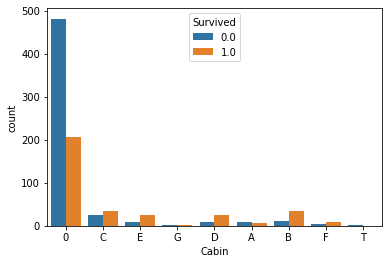

In [139]:
# 提前看一下具体的相关性情况吧
sns.countplot(x = 'Cabin',hue="Survived",data = full)
# 其实最直观的感受就是数据丢失的很多是死
#不妨直接把乘客分为数据丢失的和数据未丢失的

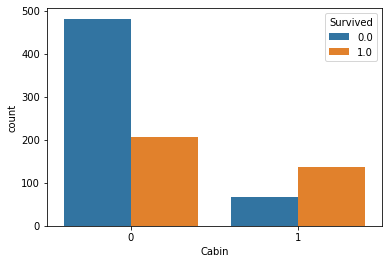

In [140]:
full['Cabin'] = full['Cabin'].map(lambda a:0 if a=='0' else 1)
sns.countplot(x = 'Cabin',hue="Survived",data = full)
# 看起来还不错

In [141]:
full.info()
#至此已经全部完成数据的填补

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 102.3+ KB


## 数据分析和特征分析

In [142]:
full['Age'].head()
#age是浮点型数据，没有问题，可以直接使用

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

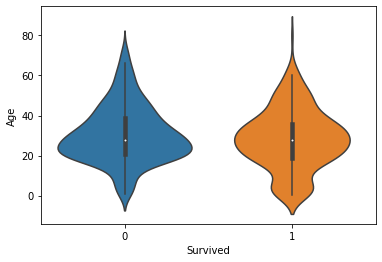

In [143]:
# demo里面认为相关性比较弱，所以没有用
# 但是电影里面是有说妇女儿童优先来着
# 我们进一步看一看
sns.violinplot(x='Survived',y='Age',data=train)

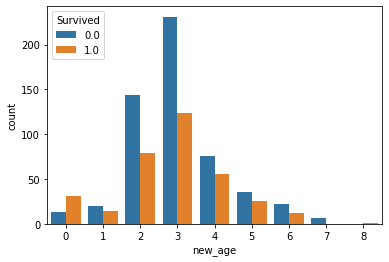

In [144]:
# 从上面图里面发现一些事，把age离散化看看
full['new_age'] = full['Age'].map(lambda a:round(a/10))
sns.countplot(x = 'new_age',hue='Survived',data = full)
# 小发现：
# {
#     0~1：获救率较高
#     2~3：获救率较低
#     4~6：获救率中等
#     >6：数据很少
# }
def helper_age(x):
    term = x/10
    if term<2:
        return 0
    elif 1<term<4:
        return 1
    elif 3<term<7:
        return 2
    else:
        return 3
full.drop('new_age',axis = 1,inplace=True)
full['Age'] = full['Age'].map(helper_age)
ageDf = pd.DataFrame()
ageDf = pd.get_dummies(full['Age'],prefix='Age')
full = pd.concat([full,ageDf],axis = 1)
full.drop('Age',axis = 1,inplace = True)

In [145]:
full['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

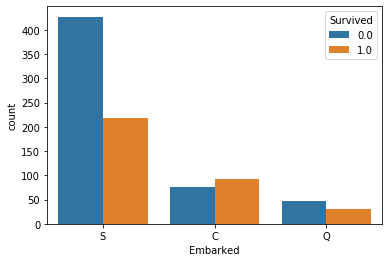

In [146]:
sns.countplot(x = 'Embarked',hue="Survived",data = full)
# 这个数据看起来就可以用

In [147]:
embarkedDf = pd.DataFrame()#建立数据框存放dummy matrix
embarkedDf = pd.get_dummies(full['Embarked'],prefix='Embarked')#predix参数用于指定类别标签
full = pd.concat([full,embarkedDf],axis=1)
full.drop('Embarked',axis=1,inplace=True)#删除‘Embarked’列

In [148]:
full['Fare'].head()
#fare是浮点型数据，没有问题，可以直接使用

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [149]:
full['Name'].head()
#名字不是很好用，本来打算drop掉，但是看到知乎的文章，知道了一种提取方式
# 详情见下

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

通过观察Name列得知，姓名包含头衔或者是称谓 例如：（Braund, Mr. Owen Harris Heikkinen, Miss. Laina Oliva y Ocana, Dona. Fermina Peter, Master. Michael J）

我们提取','后面，'.'前面的称谓作为特征

In [150]:
def get_title(name):#定义称谓提取函数
    str1=name.split(',')[1]#提取，后边的字符串
    str2=str1.split('.')[0]#提取.前面的字符串
    str3=str2.strip()#用于去除空格
    return str3
titleDf = pd.DataFrame()
titleDf['Title'] = full['Name'].map(get_title)
titleDf['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Dona              1
Jonkheer          1
Capt              1
Mme               1
Don               1
Lady              1
the Countess      1
Sir               1
Name: Title, dtype: int64

In [151]:
#头衔类别有很多，我们需要对其进行进一步的分类映射
title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
titleDf['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

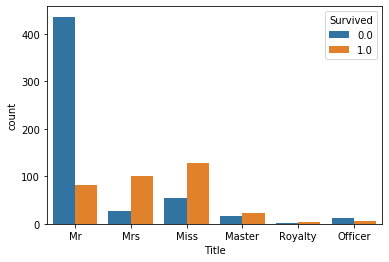

In [152]:
full = pd.concat([full,titleDf],axis=1)
full.drop('Name',axis=1,inplace=True)
sns.countplot(x = 'Title',hue ='Survived',data = full)
# 可见，这个数据也很有用
# 不过，值得注意的是，title特征和sex,pclass肯定都会有特征的重合
# 比如 Miss 肯定是female

In [153]:
titleDf = pd.get_dummies(titleDf['Title'],prefix='Title')
titleDf.head()
full = pd.concat([full,titleDf],axis=1)

In [154]:
full['Parch'].head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

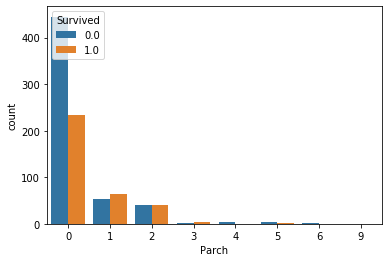

In [155]:
# 虽然demo里面，由于相关矩阵中parch价值未体现，故没有采用
# 但是部分网友的blog提出，通过数量分类可以提取有用的信息
sns.countplot(x = 'Parch',hue ='Survived',data = full)

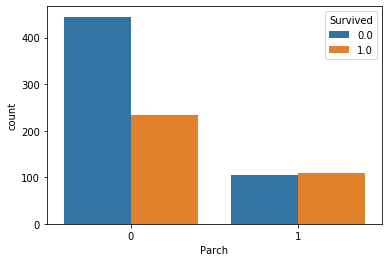

In [156]:
# 似乎0：死的多，其他：生死接近1：1
# 可以认为，0还是特殊的，所以我们只保留0，1的区别
full['Parch'] = full['Parch'].map(lambda a:0 if a==0 else 1)
sns.countplot(x = 'Parch',hue ='Survived',data = full)

In [157]:
full['SibSp'].head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

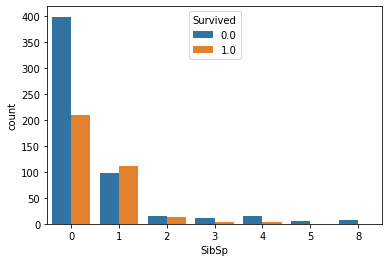

In [158]:
# 虽然demo里面，由于相关矩阵中sibsp价值未体现，故没有采用
# 但是部分网友的blog提出，通过数量分类可以提取有用的信息
sns.countplot(x = 'SibSp',hue ='Survived',data = full)

In [159]:
# 感觉：
# {
#     0：死的多，
#     1，2：生死1：1
#     更多：死的多
# }
def helper(a):
    if a==0:
        return 0
    elif a==1 or a==2:
        return 1
    else:
        return 2
full['SibSp'] = full['SibSp'].map(helper)

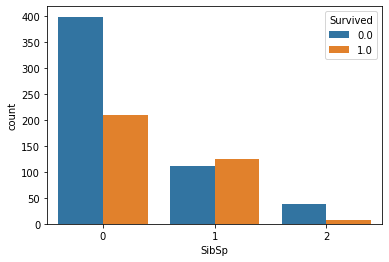

In [160]:
sns.countplot(x = 'SibSp',hue ='Survived',data = full)

In [161]:
# parch & sibsp 处理
parchDf = pd.DataFrame()
parchDf = pd.get_dummies(full['Parch'],prefix='Parch')
full = pd.concat([full,parchDf],axis=1)
full.drop('Parch',axis = 1,inplace = True)
SibSpDf = pd.DataFrame()
SibSpDf = pd.get_dummies(full['SibSp'],prefix='SibSp')
full = pd.concat([full,SibSpDf],axis=1)
full.drop('SibSp',axis = 1,inplace = True)

In [162]:
full['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [163]:
#passengerid并没有什么卵用，只是一个1~N的编号而已;ticket也读不懂
full.drop('Ticket',axis = 1,inplace=True)
pclassDf = pd.DataFrame()
pclassDf = pd.get_dummies(full['Pclass'],prefix='pclass')
full = pd.concat([full,pclassDf],axis=1)
full.drop('Pclass',axis=1,inplace=True)#删除‘Pclass’列

In [164]:
full['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

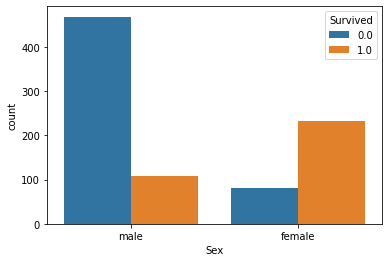

In [165]:
sns.countplot(x = 'Sex',hue ='Survived',data = full)
# 这个sex一看就很有用哇

In [166]:
full['Sex'] = full['Sex'].map(lambda x: 1 if x=="male" else 0)

In [167]:
cabinDF = pd.DataFrame()
cabinDF = pd.get_dummies(full['Cabin'],prefix='Cabin')
full = pd.concat([full,cabinDF],axis = 1)
full.drop('Cabin',axis = 1,inplace=True)

In [168]:
full.head()

,PassengerId,Survived,Sex,Fare,Age_0,Age_1,Age_2,Age_3,Embarked_C,Embarked_Q,...,Parch_0,Parch_1,SibSp_0,SibSp_1,SibSp_2,pclass_1,pclass_2,pclass_3,Cabin_0,Cabin_1
0,1,0.0,1,7.2500,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1,2,1.0,0,71.2833,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2,3,1.0,0,7.9250,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
3,4,1.0,0,53.1000,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,5,0.0,1,8.0500,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0


In [169]:
corrDF = full.corr()
for i in corrDF['Survived'].keys():
    corrDF['Survived'][i] = abs(corrDF['Survived'][i])
print(corrDF['Survived'].sort_values())
# 那么现在看来有哪些能用的数据呢？(abs>0.1)
# titleDF,sex,pclassDF,cabinDF,Fare,SibspDF,embarkedDF,parchDF,ageDF

Age_2            0.000736
Embarked_Q       0.003650
PassengerId      0.005007
Title_Officer    0.031316
Title_Royalty    0.033391
Age_3            0.044095
Age_1            0.069355
Title_Master     0.085221
pclass_2         0.093349
Age_0            0.095582
SibSp_2          0.111145
SibSp_0          0.115867
Parch_1          0.147408
Parch_0          0.147408
Embarked_S       0.149683
Embarked_C       0.168240
SibSp_1          0.177738
Fare             0.257307
pclass_1         0.285904
Cabin_1          0.316912
Cabin_0          0.316912
pclass_3         0.322308
Title_Miss       0.332795
Title_Mrs        0.344935
Sex              0.543351
Title_Mr         0.549199
Survived         1.000000
Name: Survived, dtype: float64


In [170]:
full.head()

,PassengerId,Survived,Sex,Fare,Age_0,Age_1,Age_2,Age_3,Embarked_C,Embarked_Q,...,Parch_0,Parch_1,SibSp_0,SibSp_1,SibSp_2,pclass_1,pclass_2,pclass_3,Cabin_0,Cabin_1
0,1,0.0,1,7.2500,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1,2,1.0,0,71.2833,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2,3,1.0,0,7.9250,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
3,4,1.0,0,53.1000,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,5,0.0,1,8.0500,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0


In [174]:
#构建特征子集
full_X = pd.concat( [titleDf,#titleDF
                     pclassDf,#pclass
                     cabinDF,#cabin
                     full['Sex'],#sex
                    ] , axis=1 )
full_X.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,pclass_1,pclass_2,pclass_3,Cabin_0,Cabin_1,Sex
0,0,0,1,0,0,0,0,0,1,1,0,1
1,0,0,0,1,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0,1


In [175]:
sourceRow = 891
source_X = full_X.loc[0:sourceRow-1,:]
source_y = full.loc[0:sourceRow-1,'Survived']
pred_X = full_X.loc[sourceRow:,:]

In [177]:
source_X.to_csv('source_X4.csv',index = False,sep = ',')
source_y.to_csv('source_y4.csv',index = False,sep = ',',header='Survived')
pred_X.to_csv('pred_X-4.csv',index = False,sep = ',')